<H1> Decision trees</H1>
Gives you a flow char to make a decision that depend on several variables. It give some sample data and it will result in a classification.

They are susceptible to overfiting. For that, we use Random forest technique; we can construct several alternative decision trees and let them vom on the final classification. For example, we could use the Random Forest technique, which is baggin (bootstrap aggregating) to vote on the best decission tree. This means that many models are built by training on randomly-drawn subsets of the data.

In [64]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


<H2> Load CSV file </H2>

In [65]:
import pandas as pd

In [70]:
df = pd.read_csv('../data/SliceQuality.csv', header=0)
df.head(5) # return the first 5 rows

,Age,Slicing,Slicing temp,Storage,Storage temp,Storage time,Recovery,Recovery temp,Recovery time,Recording
0,21,Suc120,0,Suc120,37,45,ACSF,21,15,1


Let's parse everything in numbers

In [42]:
myEducation = {'BS':0, 'MS':1, 'PhD':2}
df['Level of Education'] = df['Level of Education'].map(myEducation)
df.head(5)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,0,N,N,Y
1,0,N,0,0,Y,Y,Y
2,7,N,6,0,N,N,N
3,2,Y,1,1,Y,N,Y
4,20,N,2,2,Y,N,N


In [44]:
myOutPut = {'Y':1, 'N':0}
for key in ['Employed?', 'Top-tier school', 'Interned', 'Hired']:
    df[key] = df[key].map(myOutPut)
df.head(5)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [49]:
# separates features and target columns
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [51]:
df['Years Experience']

0     10
1      0
2      7
3      2
4     20
5      0
6      5
7      3
8     15
9      0
10     1
11     4
12     0
Name: Years Experience, dtype: int64

In [52]:
X = df[features]
Y = df['Hired']

<H2>Decission Tree classifier</H2>

In [53]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [54]:
clf = clf.fit(X,Y) # so easy!

<H2>Display decission tree</H2>

In [57]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

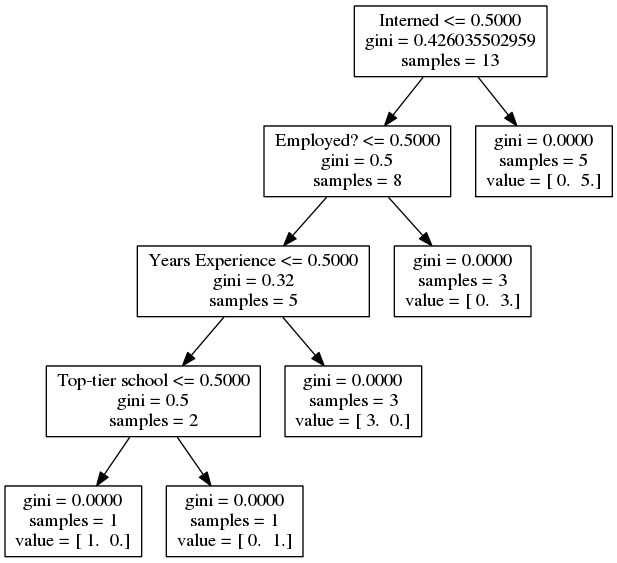

In [61]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data, feature_names = features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<H2>Ensemble learning using random forest</H2>
We use a random forest of 10 decission trees to predict 

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X,Y)

In [ ]:
# predict 